In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import os
from sklearn.manifold import TSNE
import seaborn as sns

root_dir = '../archive/'
train_dir = root_dir + 'train/'
test_dir = root_dir + 'test/'
train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

for item in range(len(train_files)-1):
    if train_files[item].startswith('.'):
        train_files.pop(item)
    if test_files[item].startswith('.'):
        test_files.pop(item)
        
print('train_files --',train_files)
print('test_files  --',test_files)

train_files -- ['happy', 'sad', 'fearful', 'neutral', 'angry', 'disgusted', 'surprised']
test_files  -- ['happy', 'sad', 'fearful', 'neutral', 'angry', 'disgusted', 'surprised']


In [30]:
def get_images(train_dir, test_dir, N): 
    #returns a training and test dictionary of image paths in png
    #where keys are labels and values are lists of N number of image paths
    train_emo = {}
    test_emo = {}
    for emotion in train_files:
        path = train_dir + '{}/'.format(emotion)
        files = os.listdir(path)
        train_emo[emotion] = files[:N]
    for emoti in test_files:
        pth = test_dir + '{}/'.format(emoti)
        fls = os.listdir(pth)
        test_emo[emoti] = fls[:N]
    return test_emo, train_emo

def png_to_np(directory, dictionary):
    #returns an np array of images where rows are flattened image arrays
    #and columns are features (flattened)
    labels = dictionary.keys()
    img_nps = np.zeros((2304,), dtype=int)
    for i in labels: #for each emotion
        for image in dictionary[i]:
            
            arr = imageio.imread(directory + i + '/'+image)
            flat_arr = arr.flatten()
            img_nps = np.vstack((img_nps,flat_arr))
    img_nps = np.delete(img_nps,0,0)
    return img_nps
            

tr, ts = get_images(train_dir, test_dir, N=10) #dictionaries of image paths with labels 
tr_imgs = png_to_np(train_dir, tr)
#test_images = png_to_np(test_dir, ts) ###problem with loading this 
y = np.arange(7) #emotion labels



In [35]:
print(y)
print(tr_imgs)

[0 1 2 3 4 5 6]
[[ 67  65  50 ... 193 255 252]
 [226 226 227 ... 180 183 192]
 [ 51  52  52 ... 216 217 218]
 ...
 [130 130 131 ... 155 155 154]
 [255 216 207 ... 131 116  65]
 [190 185 186 ... 150 154 152]]


In [47]:
m = TSNE(learning_rate=200)
TSNE_features =m.fit_transform(tr_imgs)
TSNE_features

array([[ 2.76448002e+01,  5.10569191e+01],
       [-3.26317139e+01,  1.87330933e+01],
       [ 3.61400032e+01, -3.82650185e+01],
       [ 1.38737688e+01,  5.82009363e+00],
       [-4.63274155e+01,  2.26455364e+01],
       [-4.88503265e+01,  4.19545822e+01],
       [ 4.68542099e+00,  5.83623886e+01],
       [-4.96707954e+01, -1.40050440e+01],
       [ 1.27148399e+01,  5.14634666e+01],
       [-8.98220158e+00, -4.81006508e+01],
       [ 4.72787094e+00,  4.14505501e+01],
       [-2.90026512e+01, -9.06290817e+00],
       [-9.16598511e+00, -2.56517239e+01],
       [-5.41558495e+01, -2.89382324e+01],
       [-2.02042866e+01,  1.89670715e+01],
       [ 1.29459305e+01,  3.08653622e+01],
       [-6.99487448e+00,  6.37132912e+01],
       [-1.24360914e+01, -3.82851486e+01],
       [-3.32883720e+01,  5.11042252e+01],
       [-5.37631750e+00, -1.25418081e+01],
       [-3.74909668e+01, -3.69454422e+01],
       [-1.51352949e+01, -2.01583171e+00],
       [ 2.57980595e+01,  4.27698183e+00],
       [-8.

/opt/homebrew/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

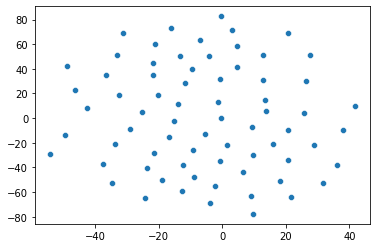

In [48]:
a = TSNE_features[:,0]
b = TSNE_features[:,1]
sns.scatterplot(a,b)